In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris  # Untuk memuat dataset Iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# membaca file csv menggunakan pandas
df = pd.read_csv ('/content/drive/MyDrive/Praktikum/Praktikum 05/Data/Iris.csv')
df.head()

--- Data Fitur Asli (Numerik) ---
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X_numerical = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_target = df['Species']

print("--- Data Fitur Asli (Numerik) ---")
print(X_numerical.head())

--- Data Fitur Asli (Numerik) ---
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [ ]:
# --- 3. Mapping (Discretization) ---
# Kita buat DataFrame baru untuk data yang sudah di-mapping
X_mapped = pd.DataFrame()

# Kita tentukan "bins" (batasan) untuk setiap fitur
# (Batasan ini saya buat berdasarkan data Iris)

# PetalLengthCm: [0-2.5]=Pendek, [2.5-5.0]=Sedang, [5.0-7.0]=Panjang
X_mapped['PetalLengthCm'] = pd.cut(X_numerical['PetalLengthCm'],
                                   bins=[0, 2.5, 5.0, 7.0],
                                   labels=['Pendek', 'Sedang', 'Panjang'])

# PetalWidthCm: [0-0.8]=Kecil, [0.8-1.8]=Sedang, [1.8-3.0]=Besar
X_mapped['PetalWidthCm'] = pd.cut(X_numerical['PetalWidthCm'],
                                  bins=[0, 0.8, 1.8, 3.0],
                                  labels=['Kecil', 'Sedang', 'Besar'])

# SepalLengthCm: [4-5.5]=Pendek, [5.5-7]=Sedang, [7-8]=Panjang
X_mapped['SepalLengthCm'] = pd.cut(X_numerical['SepalLengthCm'],
                                   bins=[4, 5.5, 7, 8.0],
                                   labels=['Pendek', 'Sedang', 'Panjang'])

# SepalWidthCm: [1.9-3.0]=Sempit, [3.0-3.8]=Sedang, [3.8-4.5]=Lebar
X_mapped['SepalWidthCm'] = pd.cut(X_numerical['SepalWidthCm'],
                                  bins=[1.9, 3.0, 3.8, 4.5],
                                  labels=['Sempit', 'Sedang', 'Lebar'])

print("--- Data Fitur Setelah di-Mapping (Kategorikal) ---")
print(X_mapped.head())

--- Data Fitur Setelah di-Mapping (Kategorikal) ---
  PetalLengthCm PetalWidthCm SepalLengthCm SepalWidthCm
0        Pendek        Kecil        Pendek       Sedang
1        Pendek        Kecil        Pendek       Sempit
2        Pendek        Kecil        Pendek       Sedang
3        Pendek        Kecil        Pendek       Sedang
4        Pendek        Kecil        Pendek       Sedang


In [ ]:
# --- 2. Membagi Data ---
#
# test_size=0.2 artinya 20% untuk testing
# random_state=42 agar hasil pembagiannya konsisten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"--- Pembagian Data Selesai ---")
print(f"Jumlah data training (80%): {len(X_train)} baris")
print(f"Jumlah data testing (20%): {len(X_test)} baris")

--- Pembagian Data Selesai ---
Jumlah data training (80%): 120 baris
Jumlah data testing (20%): 30 baris


In [ ]:
# --- 3. Membuat Model Decision Tree ---
#
# Kita gunakan criterion='entropy' agar sesuai metodologi di PDF
# max_depth=3 agar pohonnya tidak terlalu rumit dan mudah dibaca
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Melatih model menggunakan data training (80%)
model_dt.fit(X_train, y_train)

print(f"--- Model Decision Tree Berhasil Dilatih ---")
print(f"Model menggunakan kriteria: {model_dt.criterion}")
print(f"Kedalaman maksimum pohon: {model_dt.max_depth}")

--- Model Decision Tree Berhasil Dilatih ---
Model menggunakan kriteria: entropy
Kedalaman maksimum pohon: 3


In [ ]:
# --- 4. Menguji Model dengan Data Testing ---
#
# Model akan memprediksi 'Species' berdasarkan data X_test
y_pred = model_dt.predict(X_test)

# Membuat tabel perbandingan antara prediksi dan data aslinya
print(f"--- Hasil Prediksi pada Data Testing ---")
hasil_tes = pd.DataFrame({
    'Data Asli (y_test)': y_test,
    'Prediksi Model (y_pred)': y_pred
})
print(hasil_tes)

--- Hasil Prediksi pada Data Testing ---
    Data Asli (y_test) Prediksi Model (y_pred)
73     Iris-versicolor         Iris-versicolor
18         Iris-setosa             Iris-setosa
118     Iris-virginica          Iris-virginica
78     Iris-versicolor         Iris-versicolor
76     Iris-versicolor         Iris-versicolor
31         Iris-setosa             Iris-setosa
64     Iris-versicolor         Iris-versicolor
141     Iris-virginica          Iris-virginica
68     Iris-versicolor         Iris-versicolor
82     Iris-versicolor         Iris-versicolor
110     Iris-virginica          Iris-virginica
12         Iris-setosa             Iris-setosa
36         Iris-setosa             Iris-setosa
9          Iris-setosa             Iris-setosa
19         Iris-setosa             Iris-setosa
56     Iris-versicolor         Iris-versicolor
104     Iris-virginica          Iris-virginica
69     Iris-versicolor         Iris-versicolor
55     Iris-versicolor         Iris-versicolor
132     Iris-virgin

In [ ]:
# --- 5. Evaluasi Model ---
#

# 1. Menghitung Akurasi
accuracy = accuracy_score(y_test, y_pred)

# 2. Membuat Laporan Klasifikasi (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred, target_names=df['Species'].unique())

print(f"--- Evaluasi Performa Model ---")
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi:")
print(report)

# 3. Membuat Confusion Matrix
print("\nConfusion Matrix:")
print("Baris = Data Asli, Kolom = Prediksi Model")
cm = confusion_matrix(y_test, y_pred, labels=df['Species'].unique())
cm_df = pd.DataFrame(cm, index=df['Species'].unique(), columns=df['Species'].unique())
print(cm_df)

--- Evaluasi Performa Model ---
Akurasi Model: 100.00%

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
Baris = Data Asli, Kolom = Prediksi Model
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               10                0               0
Iris-versicolor            0                9               0
Iris-virginica             0                0              11



--- Visualisasi Pohon Keputusan ---


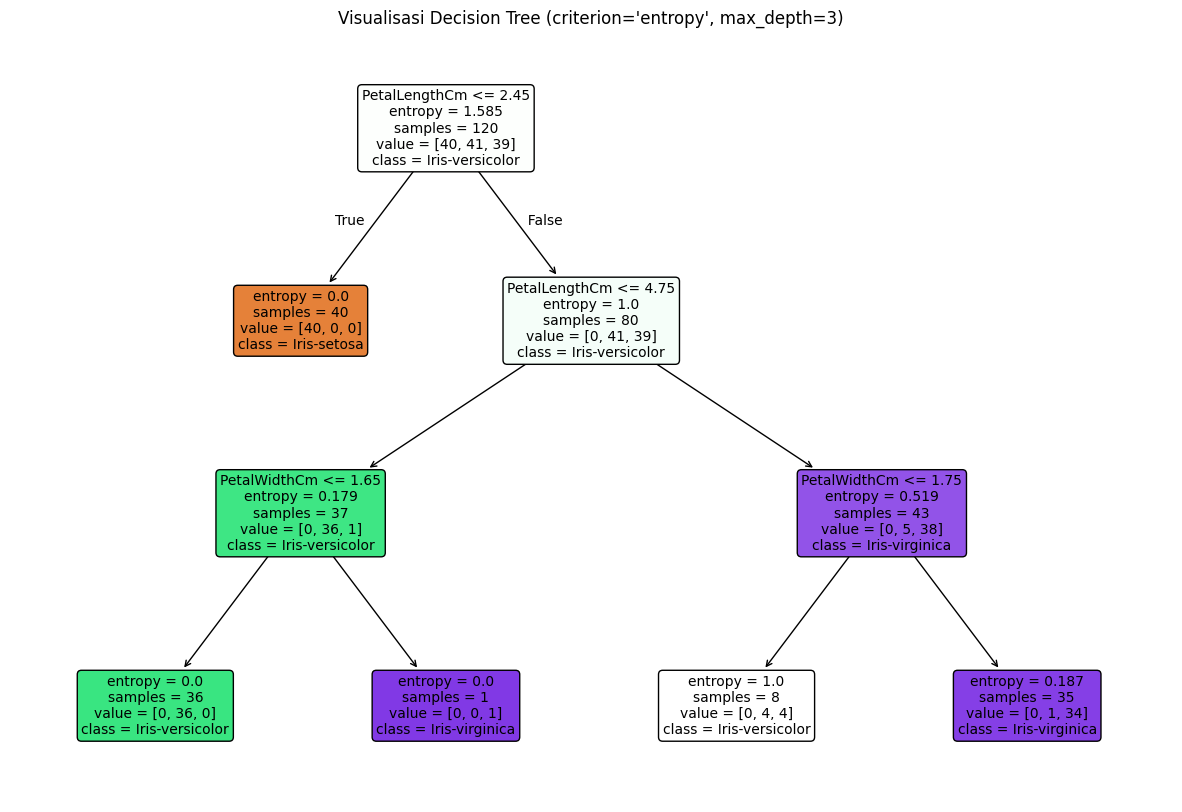

In [ ]:
# --- Langkah Tambahan: Visualisasi Pohon Keputusan ---
print("\n--- Visualisasi Pohon Keputusan ---")

plt.figure(figsize=(15, 10))
plot_tree(
    model_dt,
    feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names=df['Species'].unique(),
    filled=True,  # Beri warna pada node
    rounded=True, # Buat sudut node lebih bulat
    fontsize=10
)
plt.title("Visualisasi Decision Tree (criterion='entropy', max_depth=3)")
plt.show()